In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def func(theta, X):
  return sigmoid(np.dot(X,theta))

def compute_cost(X, Y, theta):
  m = len(Y)
  h = func(theta, X)
  epsilon = 1e-5
  cost = -(1/m)*(np.dot(Y.T, np.log(h + epsilon)) + np.dot((1-Y).T, np.log(1-h + epsilon)))
  return cost

def gradient_descent(X, Y, func, theta, depth, history, batch_size=0, alpha=0.05, epoch=1001, epsilon=0.00000001):
  m = len(Y)
  converge = False

  for i in range(epoch):
    if converge:
      break

    X_batch = X
    Y_batch = Y

    if batch_size != 0:
      m = batch_size
      batch = np.random.randint(len(X), size=m)
      X_batch = X[batch]
      Y_batch = Y[batch]

    Y_pred = func(theta, X_batch)

    div = 1/m

    theta -= alpha * div * np.dot(X_batch.T, Y_pred - Y_batch)
    
    cost = compute_cost(X, Y, theta)

    history = np.append(history, cost)

  return (history, theta)

def predict(theta, X):
  r = func(theta, X)
  return np.round(r)

In [ ]:
train_data = np.genfromtxt('hw2_train.csv', delimiter=',', skip_header=1)
test_data = np.genfromtxt('hw2_test.csv', delimiter=',', skip_header=1)

train_x = train_data[:, :2]
train_y = train_data[:, 2:]
test_x = test_data[:, :2]
test_y = test_data[:, 2:]

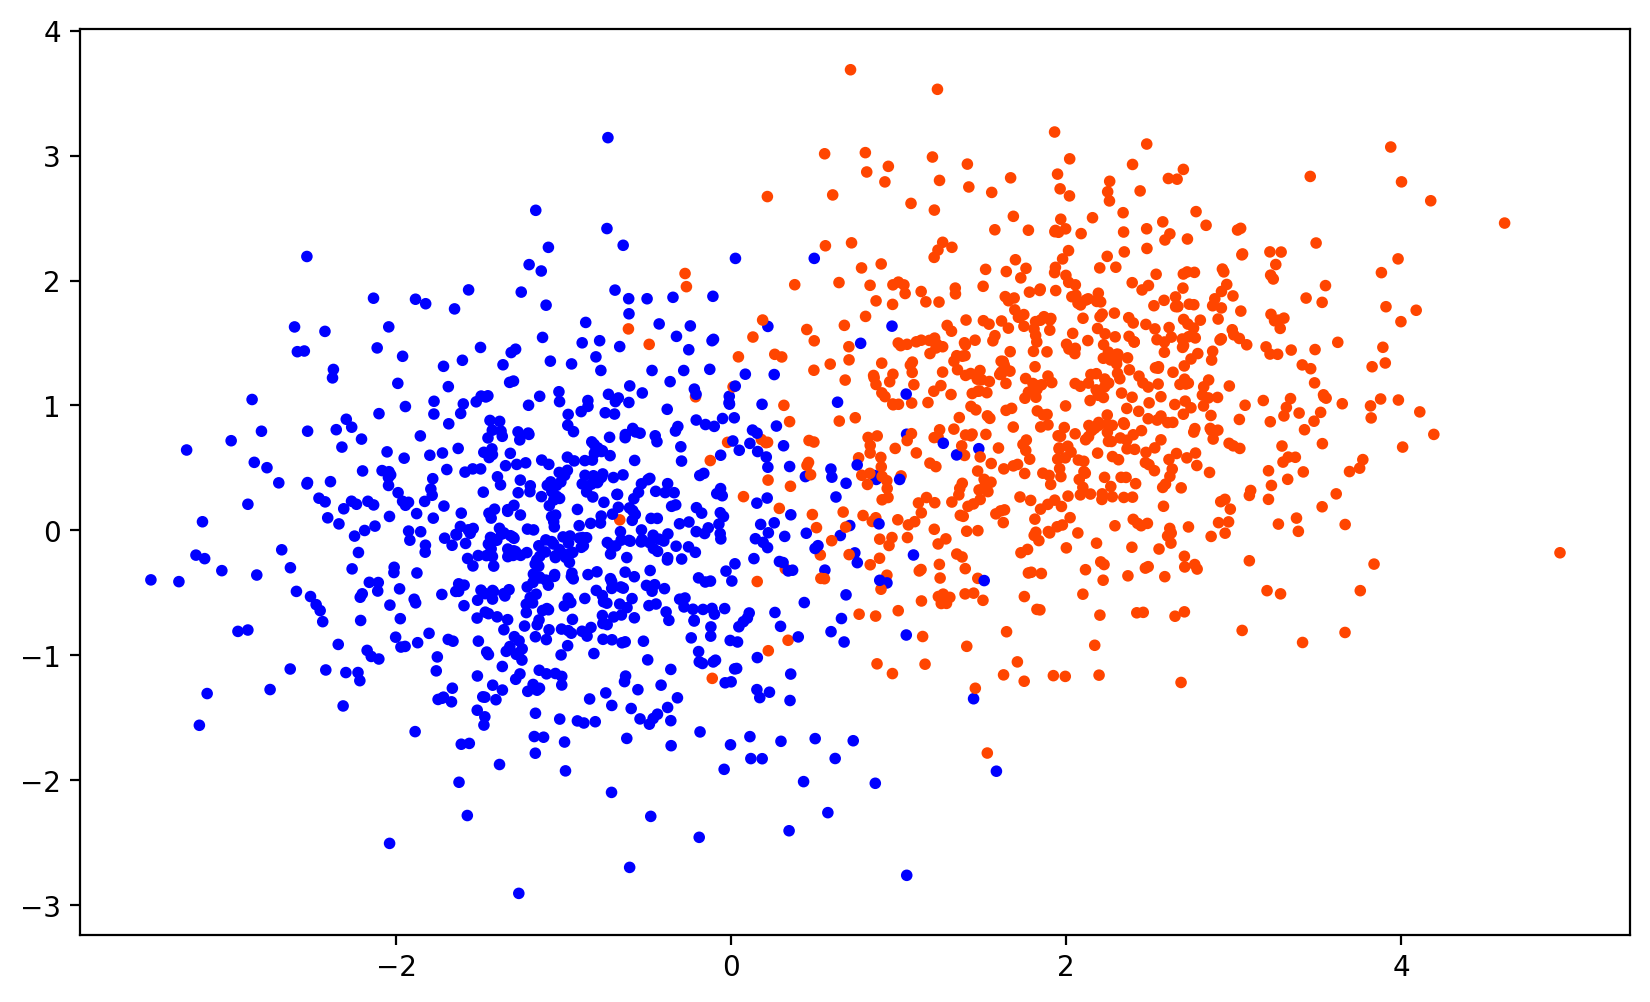

In [29]:
colors = ['orangered' if i == 0 else 'blue' for i in train_y.reshape(-1)]
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(train_x[:,0],train_x[:,1], c=colors, s=10)

depth:1, batch:0, epoch:1000, alpha:0.03, cost:0.12722290479690487, score:0.9573333333333334
depth:1, batch:0, epoch:1000, alpha:0.07, cost:0.11275445712362257, score:0.96
depth:1, batch:0, epoch:1000, alpha:0.1, cost:0.10972123673218243, score:0.9593333333333334
depth:1, batch:0, epoch:5000, alpha:0.03, cost:0.1077387926590525, score:0.9586666666666667
depth:1, batch:0, epoch:5000, alpha:0.07, cost:0.10643526829607393, score:0.958
depth:1, batch:0, epoch:5000, alpha:0.1, cost:0.10636609444848054, score:0.958
depth:1, batch:0, epoch:10000, alpha:0.03, cost:0.10651102790198484, score:0.958
depth:1, batch:0, epoch:10000, alpha:0.07, cost:0.1063548191377283, score:0.958
depth:1, batch:0, epoch:10000, alpha:0.1, cost:0.10635374458900476, score:0.958
depth:1, batch:0, epoch:15000, alpha:0.03, cost:0.10637675468923756, score:0.958
depth:1, batch:0, epoch:15000, alpha:0.07, cost:0.10635372981942123, score:0.958
depth:1, batch:0, epoch:15000, alpha:0.1, cost:0.10635370920403402, score:0.958
de

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


depth:5, batch:1, epoch:1000, alpha:0.07, cost:0.3355390877315461, score:0.9473333333333334
depth:5, batch:1, epoch:1000, alpha:0.1, cost:1.379690394274717, score:0.8526666666666667
depth:5, batch:1, epoch:5000, alpha:0.03, cost:0.2139579418548125, score:0.9506666666666667
depth:5, batch:1, epoch:5000, alpha:0.07, cost:0.27171383030242674, score:0.95
depth:5, batch:1, epoch:5000, alpha:0.1, cost:0.4649397056577375, score:0.9493333333333334
depth:5, batch:1, epoch:10000, alpha:0.03, cost:0.3500313508825378, score:0.94
depth:5, batch:1, epoch:10000, alpha:0.07, cost:0.2898382611952273, score:0.9466666666666667
depth:5, batch:1, epoch:10000, alpha:0.1, cost:0.3117724037210012, score:0.9506666666666667
depth:5, batch:1, epoch:15000, alpha:0.03, cost:0.19646450907391141, score:0.9493333333333334
depth:5, batch:1, epoch:15000, alpha:0.07, cost:0.23853843765083493, score:0.9533333333333334
depth:5, batch:1, epoch:15000, alpha:0.1, cost:0.28136886250975185, score:0.9513333333333334
depth:5, ba

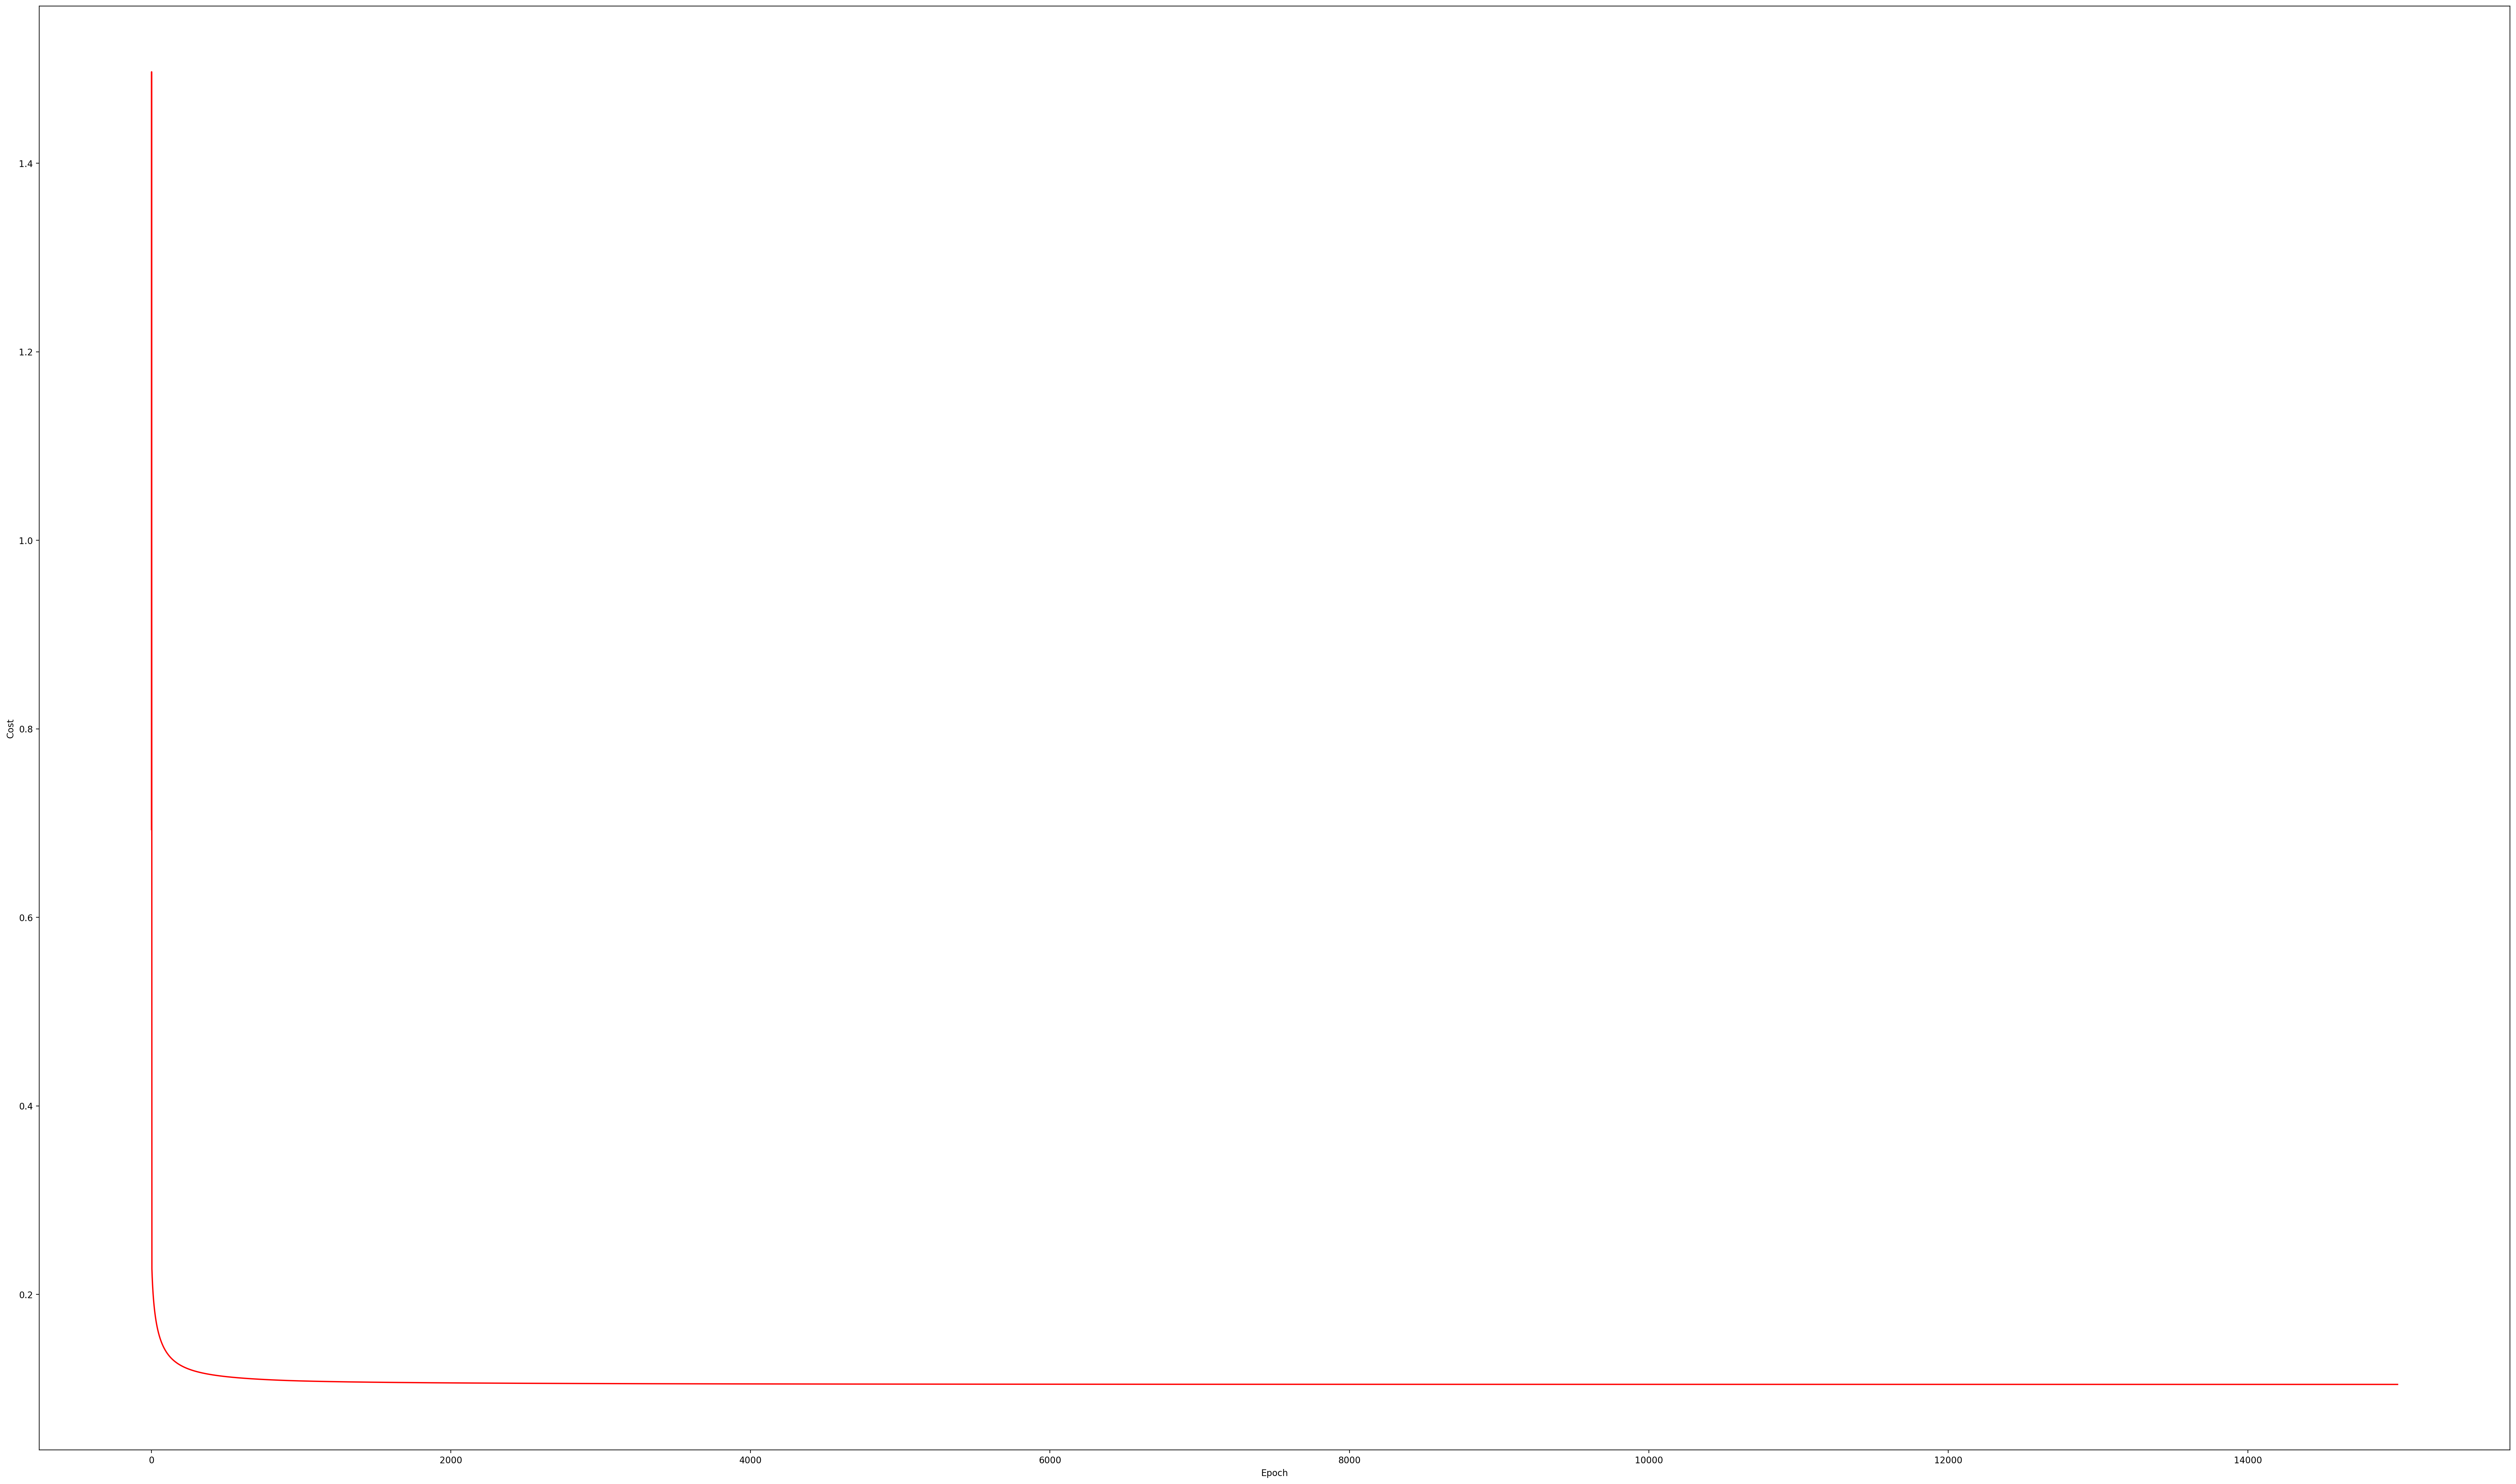

In [ ]:
import sys

m = len(train_y)

minimum_cost = sys.maxsize
optimal_history = 0
optimal_theta = 0
optimal_depth = 0
optimal_epoch = 0
optimal_batch = 0
optimal_alpha = 0

for depth in range(1, 6):
  X_0 = np.ones(m)
  X_1 = train_x[:, 0]
  X_2 = train_x[:, 1]
  X_mat = np.c_[X_0, np.c_[X_1, X_2]]
  
  for i in range(1, depth):
    X_1_exp = X_1**i
    X_2_exp = X_2**i
    X_mat = np.c_[X_mat, np.c_[X_1_exp, X_2_exp]]
  

  for batch in [0, 1, 50, 200, 500, 1000]:
    for epoch in [1000, 5000, 10000, 15000]:
      for alpha in [0.03, 0.07, 0.1]:
        n = np.size(X_mat,1)
        theta = np.zeros((n,1))
        initial_cost = compute_cost(X_mat, train_y, theta)
        history = np.array((initial_cost))

        (history, theta) = gradient_descent(X_mat, train_y, func, theta, depth, history, batch, alpha, epoch)
        if minimum_cost > history[-1]:
          minimum_cost = history[-1]
          optimal_history = history
          optimal_theta = theta
          optimal_depth = depth
          optimal_batch = batch
          optimal_epoch = epoch
          optimal_alpha = alpha
        cost = history[-1]
        y_pred = predict(theta, X_mat)
        score = float((y_pred == train_y).sum())/ float(len(train_y))
        print(f'depth:{depth}, batch:{batch}, epoch:{epoch}, alpha:{alpha}, cost:{cost}, score:{score}')
          
print(f'optimal depth:{optimal_depth}, optimal batch:{optimal_batch}, optimal epoch:{optimal_epoch}, optimal alpha:{optimal_alpha}')
print(f'optimal theta:{optimal_theta}')

plt.figure(figsize=(50, 30), dpi=200)
plt.plot(range(len(optimal_history)), optimal_history, 'r')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

depth:1, batch:0, epoch:1000, alpha:0.03, cost:0.12722290479690487, score:0.9573333333333334
depth:1, batch:0, epoch:1000, alpha:0.07, cost:0.11275445712362257, score:0.96
depth:1, batch:0, epoch:1000, alpha:0.1, cost:0.10972123673218243, score:0.9593333333333334
depth:1, batch:0, epoch:5000, alpha:0.03, cost:0.1077387926590525, score:0.9586666666666667
depth:1, batch:0, epoch:5000, alpha:0.07, cost:0.10643526829607393, score:0.958
depth:1, batch:0, epoch:5000, alpha:0.1, cost:0.10636609444848054, score:0.958
depth:1, batch:0, epoch:10000, alpha:0.03, cost:0.10651102790198484, score:0.958
depth:1, batch:0, epoch:10000, alpha:0.07, cost:0.1063548191377283, score:0.958
depth:1, batch:0, epoch:10000, alpha:0.1, cost:0.10635374458900476, score:0.958
depth:1, batch:0, epoch:15000, alpha:0.03, cost:0.10637675468923756, score:0.958
depth:1, batch:0, epoch:15000, alpha:0.07, cost:0.10635372981942123, score:0.958
depth:1, batch:0, epoch:15000, alpha:0.1, cost:0.10635370920403402, score:0.958
de

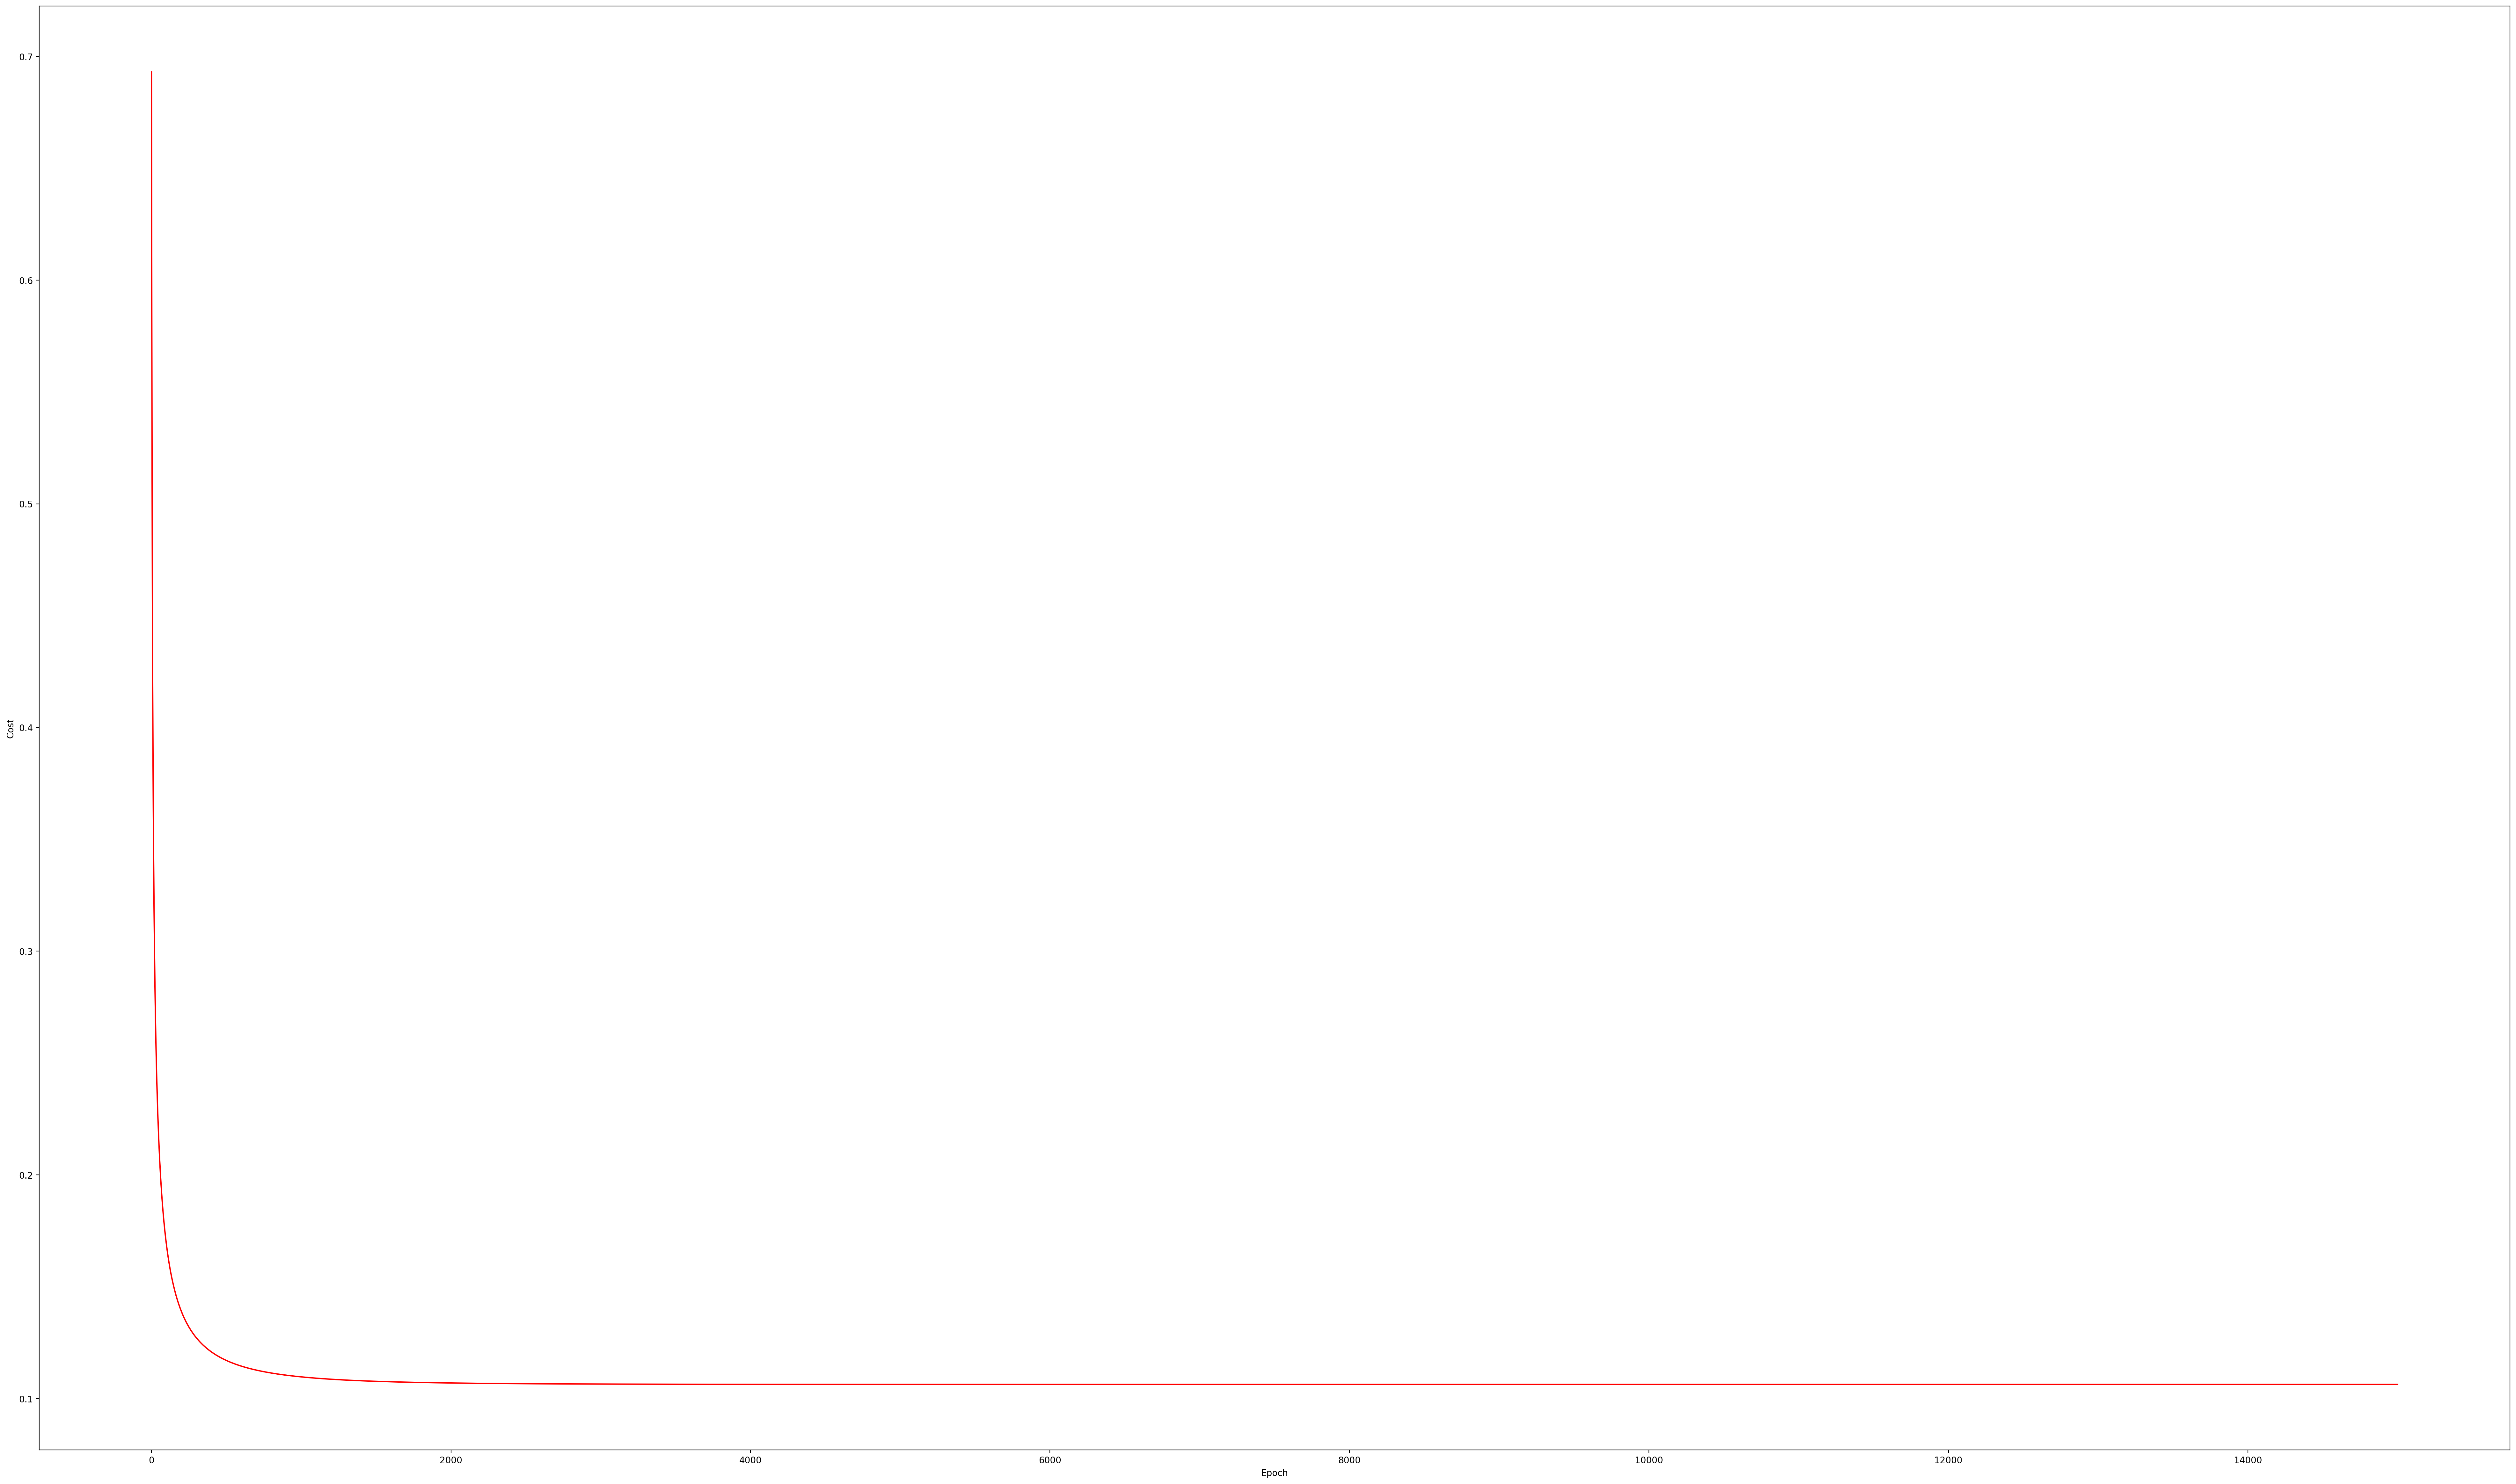

In [ ]:
import sys

m = len(train_y)

minimum_cost = sys.maxsize
optimal_history = 0
optimal_theta = 0
optimal_depth = 0
optimal_epoch = 0
optimal_batch = 0
optimal_alpha = 0

depth=1

X_0 = np.ones(m)
X_1 = train_x[:, 0]
X_2 = train_x[:, 1]
X_mat = np.c_[X_0, np.c_[X_1, X_2]]

for batch in [0, 1, 50, 200, 500, 1000]:
  for epoch in [1000, 5000, 10000, 15000]:
    for alpha in [0.03, 0.07, 0.1]:
      n = np.size(X_mat,1)
      theta = np.zeros((n,1))
      initial_cost = compute_cost(X_mat, train_y, theta)
      history = np.array((initial_cost))

      (history, theta) = gradient_descent(X_mat, train_y, func, theta, depth, history, batch, alpha, epoch)
      if minimum_cost > history[-1]:
        minimum_cost = history[-1]
        optimal_history = history
        optimal_theta = theta
        optimal_depth = depth
        optimal_batch = batch
        optimal_epoch = epoch
        optimal_alpha = alpha
      cost = history[-1]
      y_pred = predict(theta, X_mat)
      score = float((y_pred == train_y).sum())/ float(len(train_y))
      print(f'depth:{depth}, batch:{batch}, epoch:{epoch}, alpha:{alpha}, cost:{cost}, score:{score}')
        
print(f'optimal depth:{optimal_depth}, optimal batch:{optimal_batch}, optimal epoch:{optimal_epoch}, optimal alpha:{optimal_alpha}')
print(f'optimal theta:{optimal_theta}')

plt.figure(figsize=(50, 30), dpi=200)
plt.plot(range(len(optimal_history)), optimal_history, 'r')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

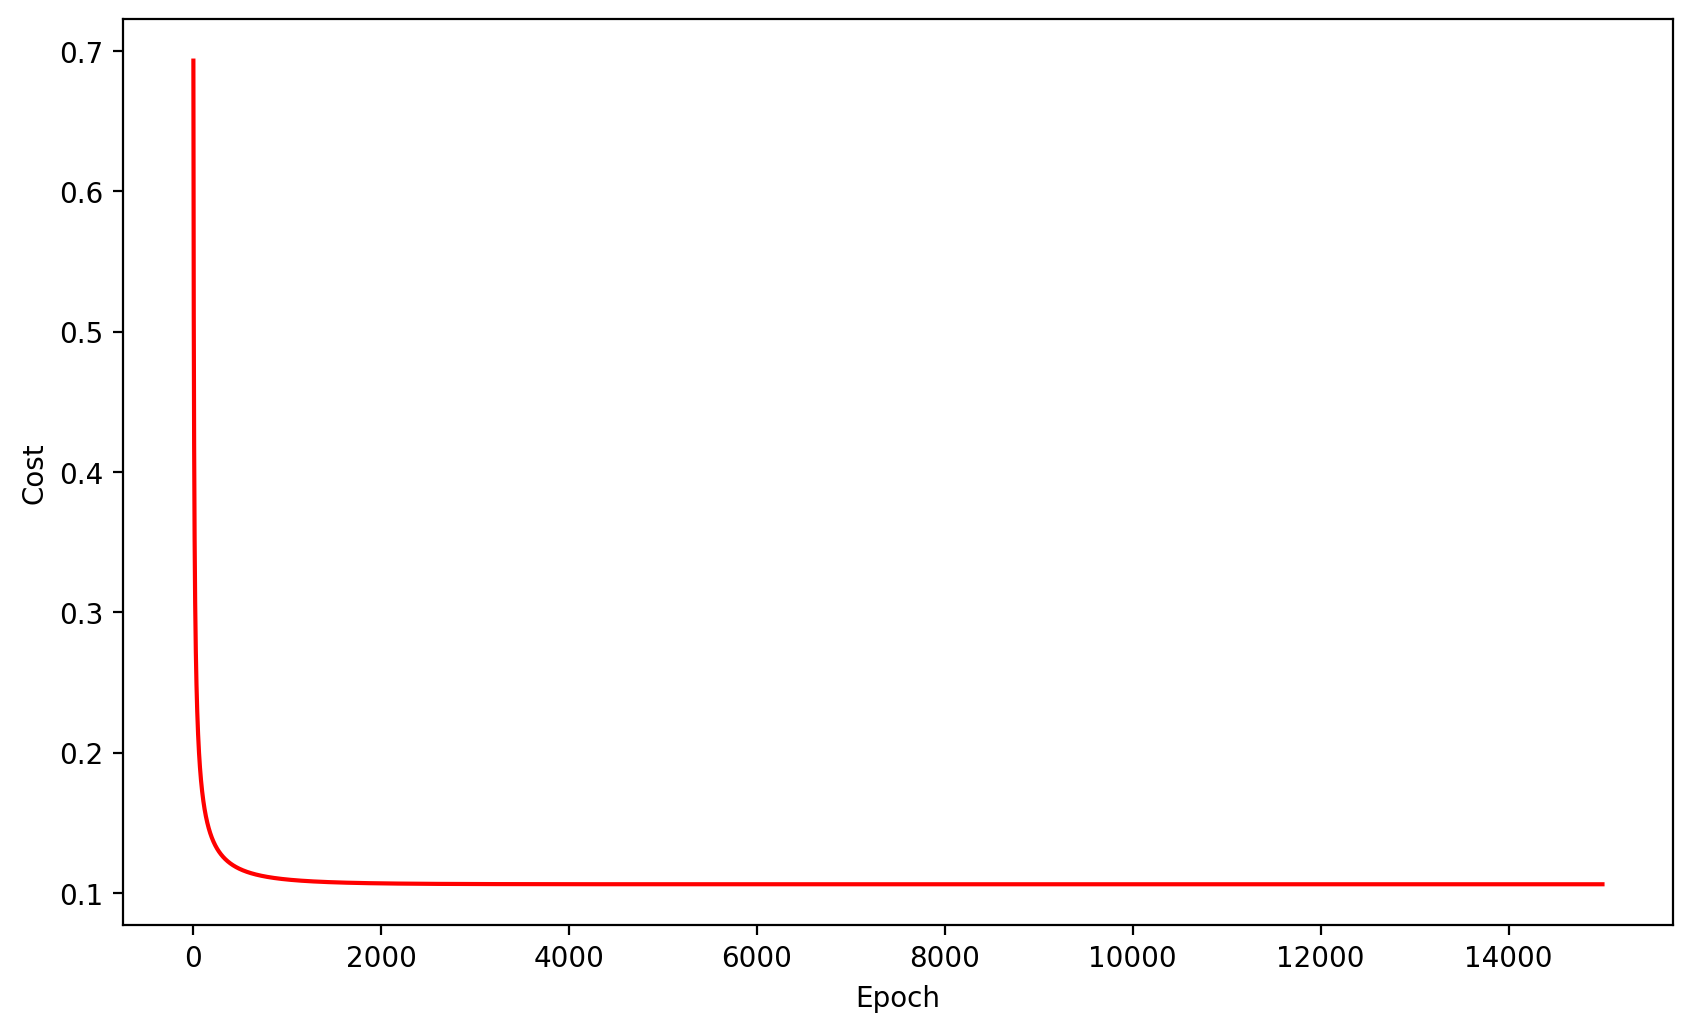

In [33]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(range(len(optimal_history)), optimal_history, 'r')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

In [35]:
y_pred = predict(optimal_theta, X_mat)
score = float((y_pred == train_y).sum())/ float(len(train_y))
train_cost = compute_cost(X_mat, train_y, optimal_theta)
print(f'train cost : {train_cost} train score:{score}')

train cost : [[0.10635371]] train score:0.958


In [ ]:
m = len(test_y)

test_X_0 = np.ones(m)
test_X_1 = test_x[:, 0]
test_X_2 = test_x[:, 1]
test_X_mat = np.c_[test_X_0, np.c_[test_X_1, test_X_2]]

for i in range(1, optimal_depth):
  test_X_1_exp = test_X_1**i
  test_X_2_exp = test_X_2**i
  test_X_mat = np.c_[test_X_mat, np.c_[test_X_1_exp, test_X_2_exp]]

#test_x = np.hstack((np.ones((m,1)),test_x))
y_pred = predict(optimal_theta, test_X_mat)
test_score = float((y_pred == test_y).sum())/ float(len(test_y))
test_cost = compute_cost(test_X_mat, test_y, theta)

print(test_score)
print(test_cost)

0.966
[[0.08810934]]


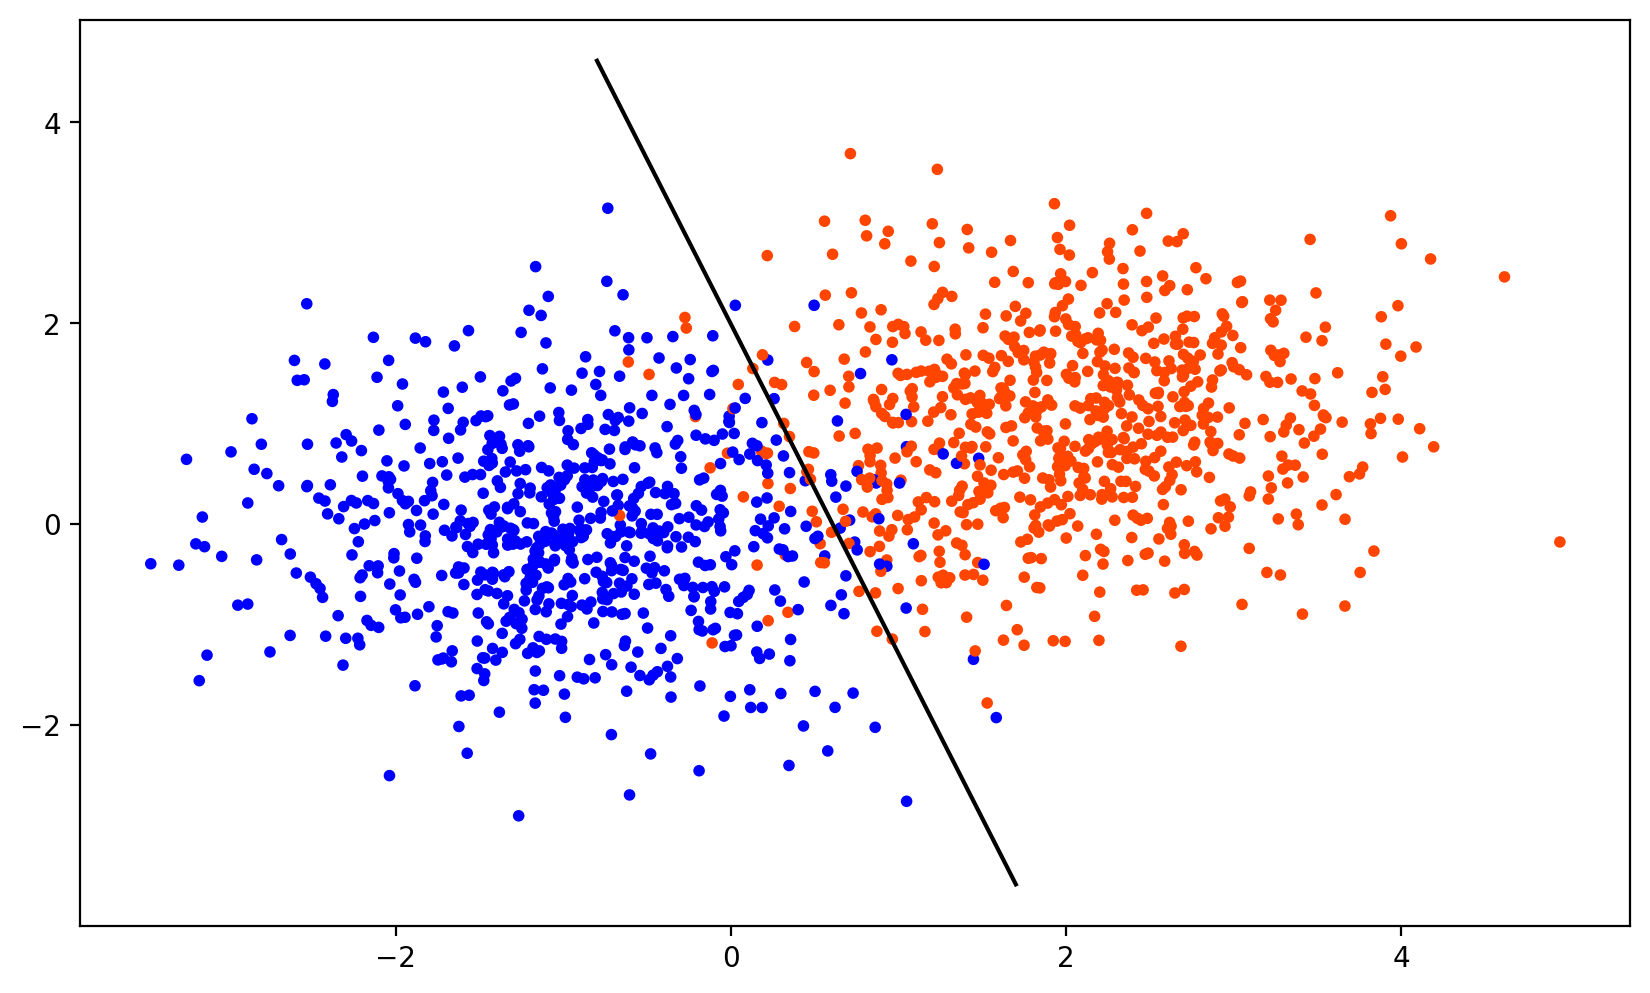

In [32]:
slope = -(optimal_theta[1] / optimal_theta[2])
intercept = -(optimal_theta[0] / optimal_theta[2])

x = [-0.8, 1.7]
y = intercept + (slope * x)
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(x, y, c="k")
colors = ['orangered' if i == 0 else 'blue' for i in train_y.reshape(-1)]
plt.scatter(train_x[:,0],train_x[:,1], c=colors, s=10)

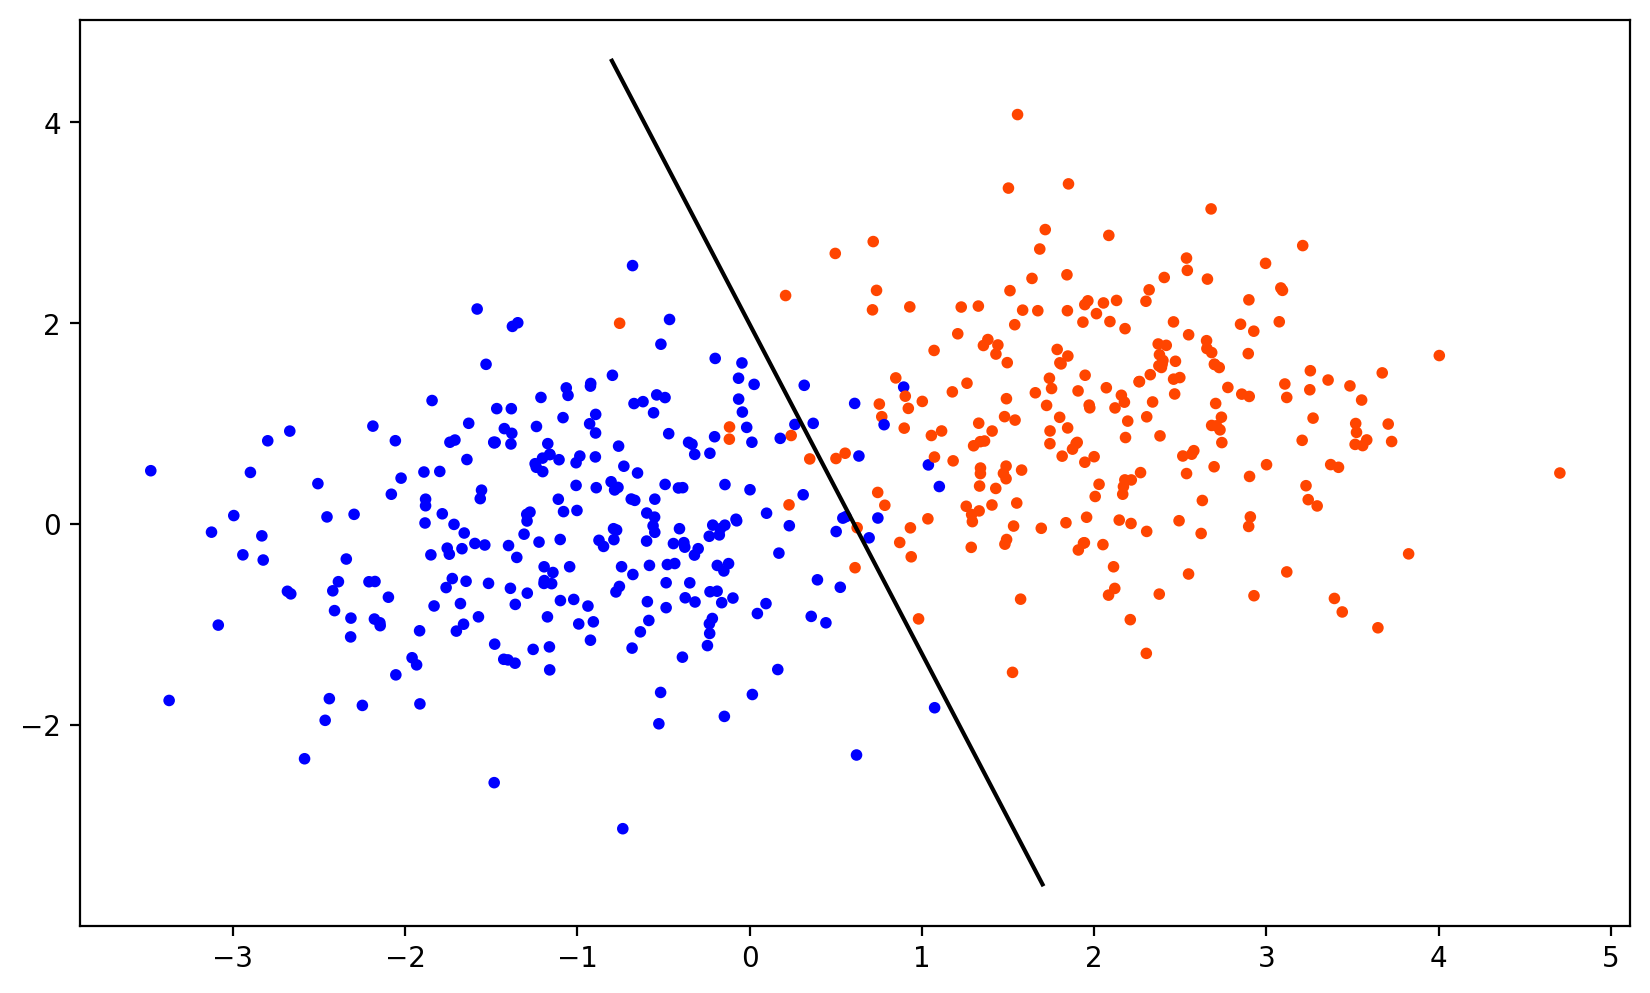

In [31]:
slope = -(optimal_theta[1] / optimal_theta[2])
intercept = -(optimal_theta[0] / optimal_theta[2])

x = [-0.8, 1.7]
y = intercept + (slope * x)
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(x, y, c="k")
colors = ['orangered' if i == 0 else 'blue' for i in test_y.reshape(-1)]
plt.scatter(test_x[:,0],test_x[:,1], c=colors, s=10)